<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
def load_quickdraw10(path):
  X = data['arr_0']
  y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20, random_state=42)
  return X_train, y_train, X_test, y_test

In [48]:
import numpy as np
data = np.load('quickdraw10.npz')

In [49]:
X_train, y_train, X_test, y_test = load_quickdraw10(data)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=0.01):
  opt = SGD(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [14]:
model = create_model()

bt_default = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=32,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 86.9682 - accuracy: 0.0996 - val_loss: 2.3297 - val_accuracy: 0.1000
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3207 - accuracy: 0.0985 - val_loss: 2.4962 - val_accuracy: 0.1002
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.4963 - val_accuracy: 0.1002
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.4962 - val_accuracy: 0.1000
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.4961 - val_accuracy: 0.0993
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.4961 - val_accuracy: 0.0993
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.4961 - val_accuracy

In [15]:
model = create_model()

bt_16 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=16,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
5000/5000 [==============================] - 10s 2ms/step - loss: 188.8251 - accuracy: 0.0988 - val_loss: 2.4727 - val_accuracy: 0.1001
Epoch 2/25
5000/5000 [==============================] - 10s 2ms/step - loss: 3.2221 - accuracy: 0.0988 - val_loss: 2.3099 - val_accuracy: 0.0988
Epoch 3/25
5000/5000 [==============================] - 9s 2ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3100 - val_accuracy: 0.1001
Epoch 4/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3100 - val_accuracy: 0.1001
Epoch 5/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 6/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3100 - val_accuracy: 0.0996
Epoch 7/25
5000/5000 [==============================] - 10s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3099 - val_a

In [16]:
model = create_model()

bt_8 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=8,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
10000/10000 [==============================] - 19s 2ms/step - loss: 3.6756 - accuracy: 0.1008 - val_loss: 2.3031 - val_accuracy: 0.1001
Epoch 2/25
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3048 - accuracy: 0.0991 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 3/25
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3047 - val_accuracy: 0.1002
Epoch 4/25
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3047 - val_accuracy: 0.1001
Epoch 5/25
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3049 - val_accuracy: 0.0988
Epoch 6/25
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3047 - val_accuracy: 0.0993
Epoch 7/25
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2

In [17]:
model = create_model()

bt_64 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 3.0275 - accuracy: 0.1006 - val_loss: 2.3022 - val_accuracy: 0.1009
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3006 - accuracy: 0.1002 - val_loss: 2.2996 - val_accuracy: 0.1035
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.2898 - accuracy: 0.1058 - val_loss: 2.2695 - val_accuracy: 0.1236
Epoch 4/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.2310 - accuracy: 0.1419 - val_loss: 2.2266 - val_accuracy: 0.1412
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.2463 - accuracy: 0.1316 - val_loss: 2.3071 - val_accuracy: 0.1001
Epoch 6/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3042 - accuracy: 0.0983 - val_loss: 2.3036 - val_accuracy: 0.1001
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3036 - accuracy: 0.0985 - val_loss: 2.2689 - val_accuracy:

In [18]:
model = create_model()

bt_128 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=128,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
625/625 [==============================] - 1s 2ms/step - loss: 6.8858 - accuracy: 0.1053 - val_loss: 2.3054 - val_accuracy: 0.0988
Epoch 2/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3036 - val_accuracy: 0.0993
Epoch 3/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 4/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 5/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 6/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 7/25
625/625 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0988
Epoch 

In [20]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_16, bt_8, bt_64, bt_128], ["32_", "16_", "8_", "64_", "128_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,86.968170,0.099563,2.329689,0.1000,0,32_
1,2.320731,0.098537,2.496250,0.1002,1,32_
2,2.302645,0.098300,2.496272,0.1002,2,32_
3,2.302658,0.099650,2.496190,0.1000,3,32_
4,2.302635,0.099575,2.496093,0.0993,4,32_


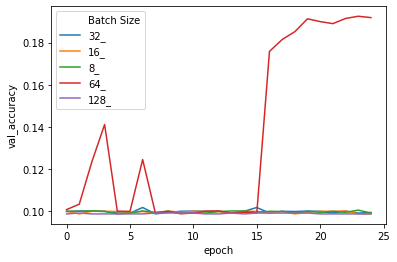

In [21]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [22]:
model = create_model(lr=0.01)

bt_base = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 8.1623 - accuracy: 0.0989 - val_loss: 2.3078 - val_accuracy: 0.0988
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3047 - accuracy: 0.0995 - val_loss: 2.3062 - val_accuracy: 0.0988
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3062 - val_accuracy: 0.1001
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3062 - val_accuracy: 0.0996
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3062 - val_accuracy: 0.0993
Epoch 6/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3025 - accuracy: 0.0971 - val_loss: 2.3063 - val_accuracy: 0.0988
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3025 - accuracy: 0.0986 - val_loss: 2.3062 - val_accuracy:

In [23]:
model = create_model(lr=0.1)

bt_lr_01 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 124.4445 - accuracy: 0.1002 - val_loss: 5.2228 - val_accuracy: 0.1000
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3355 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.0988
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3030 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3029 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 5/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.1002
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3030 - accuracy: 0.1006 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 7/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3028 - val_accurac

In [24]:
model = create_model(lr=0.5)

bt_lr_05 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 275218784.0000 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1001
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 4.2572 - accuracy: 0.1009 - val_loss: 2.3038 - val_accuracy: 0.0996
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3045 - accuracy: 0.0992 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.1006 - val_loss: 2.3043 - val_accuracy: 0.1002
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3042 - accuracy: 0.0987 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.0993 - val_loss: 2.3038 - val_accuracy: 0.1001
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3044 - accuracy: 0.1003 - val_loss: 2.3034 - val_a

In [25]:
model = create_model(lr=0.005)

bt_lr_0005 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 4.2221 - accuracy: 0.1061 - val_loss: 2.2753 - val_accuracy: 0.1248
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2550 - accuracy: 0.1288 - val_loss: 2.2427 - val_accuracy: 0.1436
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.1923 - accuracy: 0.1580 - val_loss: 2.2050 - val_accuracy: 0.1708
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.1278 - accuracy: 0.1837 - val_loss: 2.0904 - val_accuracy: 0.1817
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0686 - accuracy: 0.2086 - val_loss: 2.0193 - val_accuracy: 0.2090
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9650 - accuracy: 0.2292 - val_loss: 1.9039 - val_accuracy: 0.2498
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8726 - accuracy: 0.2549 - val_loss: 1.8475 - val_accuracy:

In [26]:
model = create_model(lr=0.00005)

bt_lr_000005 = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 8.6116 - accuracy: 0.2546 - val_loss: 2.8382 - val_accuracy: 0.2715
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.4110 - accuracy: 0.2964 - val_loss: 2.1953 - val_accuracy: 0.3068
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0741 - accuracy: 0.3243 - val_loss: 2.0138 - val_accuracy: 0.3307
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9461 - accuracy: 0.3409 - val_loss: 1.9219 - val_accuracy: 0.3417
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8708 - accuracy: 0.3521 - val_loss: 1.8610 - val_accuracy: 0.3519
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8161 - accuracy: 0.3582 - val_loss: 1.8111 - val_accuracy: 0.3582
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7732 - accuracy: 0.3681 - val_loss: 1.7735 - val_accuracy:

In [27]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_base, bt_lr_01, bt_lr_05, bt_lr_0005, bt_lr_000005], [".01_", ".1_", ".5_", "0.0005", "0.0000005"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()


,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,8.162267,0.098888,2.307848,0.09885,0,.01_
1,2.304704,0.099537,2.306243,0.09885,1,.01_
2,2.302701,0.099413,2.306242,0.10010,2,.01_
3,2.302613,0.098063,2.306240,0.09955,3,.01_
4,2.302565,0.098625,2.306246,0.09925,4,.01_


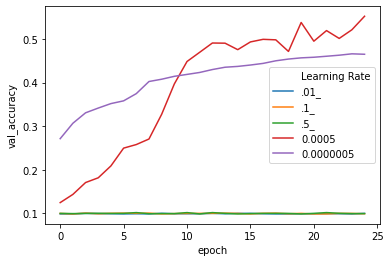

In [28]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [54]:
from tensorflow import keras


In [56]:
def create_model(lr=0.005):
  opt = keras.optimizers.Adam(learning_rate=lr)
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [58]:
model = create_model(lr=0.005)

model_adam = model.fit(X_train, 
                       y_train,
                       epochs=25,
                       batch_size=64,
                       validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9576 - accuracy: 0.4160 - val_loss: 1.4683 - val_accuracy: 0.4613
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3409 - accuracy: 0.5231 - val_loss: 1.2361 - val_accuracy: 0.5893
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1776 - accuracy: 0.6004 - val_loss: 1.1838 - val_accuracy: 0.6205
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1509 - accuracy: 0.6115 - val_loss: 1.1498 - val_accuracy: 0.6176
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1422 - accuracy: 0.6119 - val_loss: 1.1509 - val_accuracy: 0.6187
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1505 - accuracy: 0.6105 - val_loss: 1.1789 - val_accuracy: 0.6168
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1472 - accuracy: 0.6159 - val_loss: 1.1695 - val_accuracy:

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 

![asdf](https://i.ytimg.com/vi/An5z8lR8asY/maxresdefault.jpg)




## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


